# Homework 5: 

**DUE:** 5pm EST, March 17, 2020

<br>

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose that we have a dataset with five predictors, $X_1 = GPA$, $X_2 = IQ$, $X_3 = Gender$ (1 for Female and 0 for Male), $X_4$ = Interaction between GPA and IQ, and $X_5$ = Interaction between GPA and Gender. The response variable ($Y$) is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta_0}$ =50, $\hat{\beta_1}$ =20, $\hat{\beta_2}$ =0.07, $\hat{\beta_3}$ =35, $\hat{\beta_4}$ =0.01, $\hat{\beta_5}$ =-10.

<br>
    
_(a) Which answer is correct, and why?_

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

**Answer:**
iii. For a fixed value of IQ and GPA, males earn more than females on average provided that the GPA is high enough

The regression equation tells us that salary generally increases as GPA increases for both males and females. The negative interaction term tells us that the slopes of the regression lines for the relation between GPA and salary differs by gender and that females earn less than males at some values of GPA. I think plugging in values to visualize the predicted salaries is helpful... For instance, if we consider a high GPA value, e.g. 4, and plug that into the regression equation, we'll observe that the predicted salary for males is higher than females. If we consider a low GPA value, e.g. 2, we'll observe that the predicted salary for males is lower than females. We can also plug in values between 2 and 4 for more information. 

<br>

_(b) Predict the salary of a female graduate with IQ of 110 and a GPA of 4.0._

**Answer:**
$Y = 50 + 20X_1 + .07X_2 + 35X_3 + .01X_4 - 10X_5$
$Y = 50 + 20(4) + .07(110) + 35(1) + .01(4)(110) - 10(4)(1)$
$Y = 137,100$

The salary is $137,1000.

<br>

_(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer._

**Answer:**
False. The coefficient for the interaction term specifies the magnitude of the association between GPA, IQ, and salary, not whether there is an effect or not.


---

2. What are high leverage observations? How do they impact your model fits? What assumption of linear regression do they violate?

**Answer:**
High leverage observations are outliers on the predictor variable that bias the estimation of the regression line. They have a stronger relative influence on the estimation of the line than other observations. The presence of these observations violate the assumption of normally distributed residuals because they pull the estimation of the regression line toward them; in a residual plot, the residuals of the other observations would not appear randomly along the 0 line.

---

3. A linear mixed effect model has the form $Y = X\beta + Z\upsilon + \epsilon$. 

<br>

_(a) What are the assumptions about $Z$ and $\upsilon$ that make this different from using a regular control variable in a simple linear regression model?_

**Answer:** 
In a random factor, $Z$ is assumed to have its own random structure and the units or levels of $Z$ have no meaningful difference (but each level contributes its own variance in $Y$). In other words, $Z$ is assumed to be randomly sampled from some underlying population which can vary across replications of a study. The variance of $v$ is different from the variance of the regression coefficients on the fixed effects. 

<br>

_(b) What is the objective function for this model (i.e., the function that needs to be minimized to find the optimal parameters) and how is it different than the objective function for the ordinary least squares model?_

**Answer:**
The objective function for the mixed effects model is $$min(||Y-X\beta-Z\Lambda_{\theta}\upsilon||^2+||\upsilon||^2),$$ where $\Lambda$ represents the covariance matrix that explains the random structure of $Z$ and $||\upsilon||^2$ is a sparsity constraint that shrinks the influence that $Z$ has on the overall model fit. A unit change in $Z$ does not correspond to some unit change in $Y$. This function attempts to minimize error while considering the variance that the levels of $Z$ have in $Y$. <br><br>The function for the OLS model with a confounding variable is $$min(||Y-\beta_0-X_{real}\beta_1 - X_{confound} \beta_2 ||^2)$$ In OLS, you are attempting to minimize the mean squared error and you can include a potentially confounding variable in there to further minimize the MSE. Including a confound means the model will give you the partial effect of $X_{real}$ on $Y$ given $X_{confound}$, assuming the relation between $X_{real}$ and $Y$ is correlated with $X_{confound}$.

<br>

_(c) What advantage does including a random effects term in your model give you with regards to understanding the fixed effects relationship?_

**Answer:**
Including this factor eliminates the variance observed in $Y$ that is due to random variables; you may overestimate the fixed effects on $Y$ if you don't include random effects.


<br>

_(d) Which of these variables would be considered random factors?_

* Age
* Subject ID
* Classroom number
* Gender
* Reaction Time
* JPEG image filename
* Time of day

**Answer:**
Subject ID, classroom number, JPEG image filename


---

### **Applied:** Show your code & plots

We will use both datasets from the CRAN universe and the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells.

---

4. Load the cbpp dataset from the lme4 library. Run ?cbpp after loading the lme4 library to get information on the dataset.

(a) Plot the relationship between herd size and CBPP incidence


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




[1] "herd"      "incidence" "size"      "period"

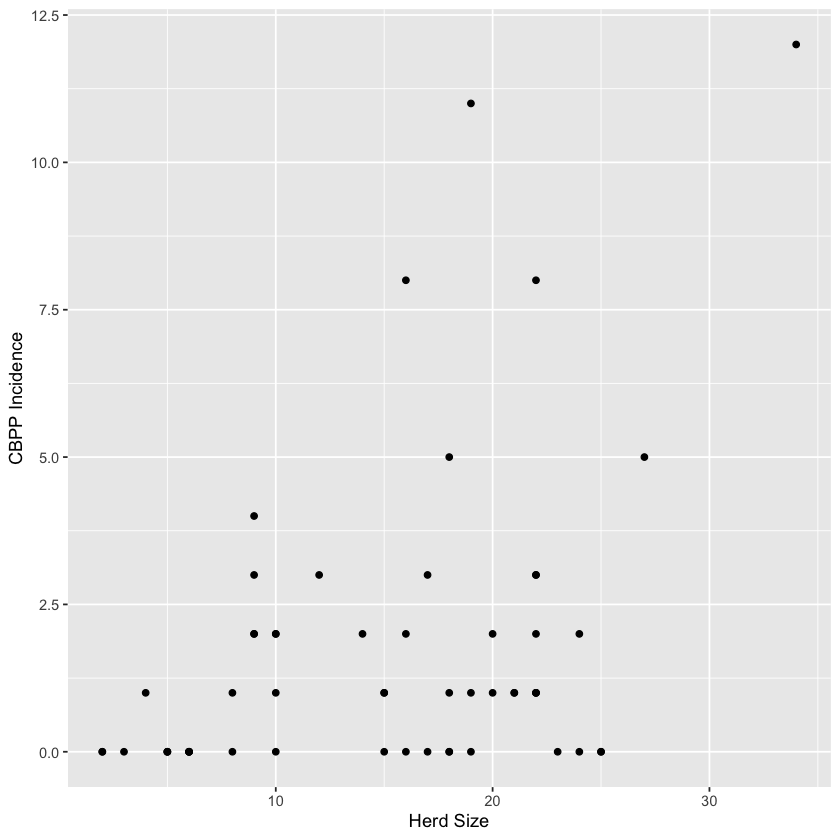

In [1]:
# -------------------------------
# Question 4
# -------------------------------
library(tidyverse)
library(lme4)
library(ggplot2)
names(cbpp)
?cbpp
ggplot(data=cbpp, aes(size, incidence)) + geom_point() +xlab('Herd Size') + ylab('CBPP Incidence')




(b) Use the lm function to model the effect of herd size (predictor) on CBPP incidence (response). How does herd size impact disease rate? Report the results of the model.


In [2]:
# (b)
lm=lm(incidence~size,data=cbpp)
summary(lm)
#For a one unit increase in herd size, CBPP incidence increases by .13827; 
#this estimate for the relation between herd size and incidence is significantly different from 0. 
#The RSE tells us that the observed values of herd size deviate from the predicted values by 2.432 units on average.
#The adjusted R-squared value tells us that the proportion of variance in CBPP incidence that is explained by herd size is 13.96.
#The F-statistic basically gives us the same information as the t-test here; it is more interesting to look at when there are multiple predictors...


Call:
lm(formula = incidence ~ size, data = cbpp)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1456 -1.5925 -0.4864  0.8006  8.6840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.31106    0.73554  -0.423  0.67405   
size         0.13827    0.04389   3.150  0.00266 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.432 on 54 degrees of freedom
Multiple R-squared:  0.1553,	Adjusted R-squared:  0.1396 
F-statistic: 9.926 on 1 and 54 DF,  p-value: 0.002657



(c) Use the lmer function to include the herd identifier as a random effect. How does this impact the fixed effect of herd size on CBPP incidence?


In [5]:
# (c)
mixed.herd=lmer(incidence~size+(size|herd), data=cbpp)
summary(mixed.herd)
#the fixed effect estimate in this model is .19645 (it is .13827 in the simple linear model above).
#the magnitude of the association between incidence rate and herd size is slightly larger in the mixed effects model.

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: incidence ~ size + (size | herd)
   Data: cbpp

REML criterion at convergence: 240.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7937 -0.5979 -0.1649  0.4926  2.5174 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 herd     (Intercept) 0.5398   0.7347        
          size        0.0331   0.1819   -1.00
 Residual             2.4319   1.5595        
Number of obs: 56, groups:  herd, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.54192    0.63637  -0.852
size         0.19645    0.06483   3.030

Correlation of Fixed Effects:
     (Intr)
size -0.822
convergence code: 0
boundary (singular) fit: see ?isSingular



(d) Compare the simple linear model (i.e., the fixed effects only model) with the mixed effect model using AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion). Does adding the random effect to the model improve or change the fixed effect?


In [6]:
# (d)
ic = AIC(lm,mixed.herd)
ic
diff(ic$AIC)
#The difference in AIC is small and the more complex or mixed effects model is the (slightly) more parsimonious model, accounting for more variance in incidence rate even after accounting for its increased complexity.

,df,AIC
,<dbl>,<dbl>
lm,3,262.4036
mixed.herd,6,252.2996


[1] -10.10405

---

5. Load the HCP dataset.

_(a) Make a new data frame that includes the fields for subject ID (Subject), gender (Gender), age (Age), intracranial volume (FS_IntraCranial_Vol), and total gray matter volume (FS_Total_GM_Vol). Load the variables in that order. Remove the _na_'s and z-score the values for intracranial volume and total gray matter volume._

In [7]:
# -------------------------------
# Question 5
# -------------------------------
d<-read.csv('/Users/shirleyduong/Desktop/Duong_DSPN_S20/unrestricted_trimmed_1_7_2020_10_50_44.csv')
d1<-select(d, Subject, Gender, Age, FS_IntraCranial_Vol,FS_Total_GM_Vol)
d1<-na.omit(d1)
d1<-mutate(d1, FS_IntraCranial_Vol_z=(FS_IntraCranial_Vol-mean(FS_IntraCranial_Vol))/sd(FS_IntraCranial_Vol))
d1<-mutate(d1, FS_Total_GM_Vol_z=(FS_Total_GM_Vol-mean(FS_Total_GM_Vol))/sd(FS_Total_GM_Vol))


<br>

(b) Take this new dataframe and fit a simple logistic regression model to classify gender based on the intracranial volume measure and examine the model fit using the summary function_


In [8]:
# (b)
glm.log=glm(Gender~FS_IntraCranial_Vol_z, data=d1, family=binomial)
summary(glm.log)
#it appears that there is an association between intracranial volume and gender.


Call:
glm(formula = Gender ~ FS_IntraCranial_Vol_z, family = binomial, 
    data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5646  -0.6769  -0.1836   0.6434   3.5450  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.36336    0.08133  -4.467 7.91e-06 ***
FS_IntraCranial_Vol_z  2.22771    0.13192  16.886  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  968.67  on 1111  degrees of freedom
AIC: 972.67

Number of Fisher Scoring iterations: 5


<br>

(c) Calculate the confusion matrix for evaluating how well the model can classify the dataset and find the classification accuracy for the logistic regression model. Report the classification accuracy.

**Note:** Be careful to take note how R automatically codes Gender and make sure your labels are matched accordingly.


In [9]:
# (c)
glm_prob_df = data.frame(predict(glm.log, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$index = seq(1, nrow(glm_prob_df))
contrasts(d1$Gender)
glm_prob_df<-mutate(glm_prob_df, predicted_binary=ifelse(predicted_prob>.5, "M", "F"))

#look at prediction accuracy
confusion = data.frame(glm_prob_df$predicted_binary, d1$Gender)
colnames(confusion) = c('predicted', 'actual')
table(confusion)
mean(confusion$predicted == confusion$actual)
#the classification accuracy is .81

,M
F,0
M,1


         actual
predicted   F   M
        F 506 113
        M 100 394

[1] 0.8086253

<br>

(d) Using the _boot_ library, calculate the leave one out cross-validation (LOOCV) for the same model you fit in (b).

In [10]:
# (d)
library(boot)
cv.err  = cv.glm(d1, glm.log, K=nrow(d1))
cv.err$delta
#raw cross-validation estimate of prediction error = .136790098816271
#adjusted cross-validation estimate = .136789845611662

[1] 0.1367901 0.1367898

<br>

(e) Now test the k-fold cross validation accuracy using K=10. Is this better, worse, or the same than the LOCCV accuracy?

In [11]:
# (e)
cv.err.k  = cv.glm(d1, glm.log, K=10)
cv.err.k$delta
#The k-fold cross validation accuracy is just about the same as the LOOCV accuracy (and less computationally costly).

[1] 0.1366181 0.1365972

(f) Finally, fit a LDA model with the same variables and plot the model fit. Make sure you load the MASS library to use the lda function. What's the classification accuracy of the LDA model?


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
lda(Gender ~ FS_IntraCranial_Vol_z, data = d1)

Prior probabilities of groups:
        F         M 
0.5444744 0.4555256 

Group means:
  FS_IntraCranial_Vol_z
F            -0.5673165
M             0.6780943

Coefficients of linear discriminants:
                           LD1
FS_IntraCranial_Vol_z 1.274621

          
lda.gender   F   M
         F 501 111
         M 105 396

[1] 0.8059299

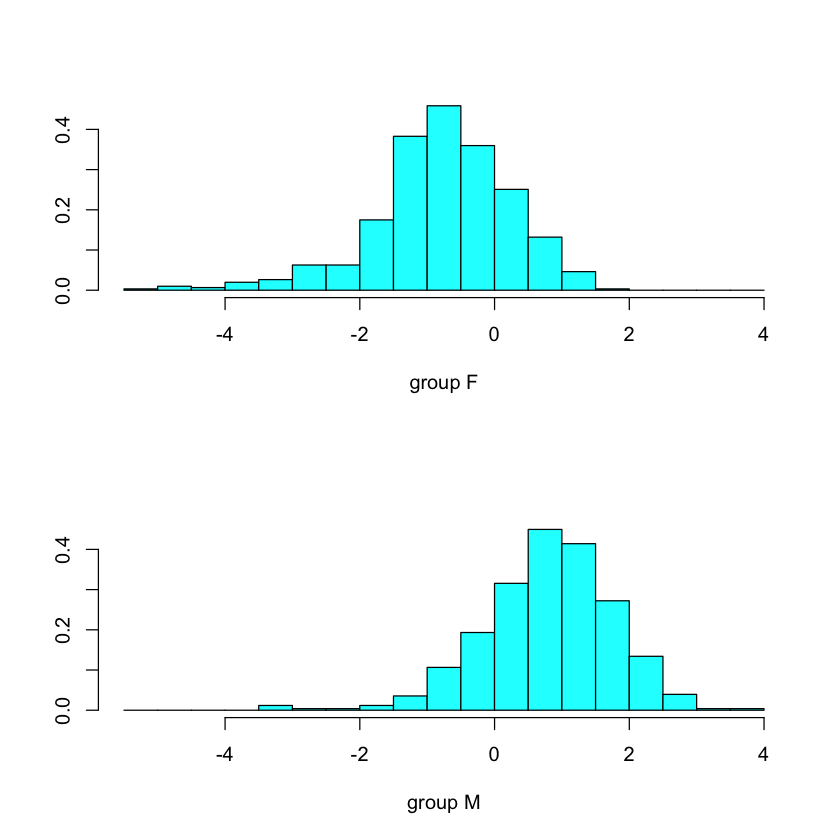

In [12]:
# (f)
library(MASS)
lda.fit = lda(Gender~FS_IntraCranial_Vol_z, data=d1)
lda.fit
plot(lda.fit)

#make predictions from LDA coefficients
lda.pred=predict(lda.fit)
lda.gender=lda.pred$class
table(lda.gender, d1$Gender)
mean(lda.gender==d1$Gender)
#classification accuracy is .81
